<a href="https://colab.research.google.com/github/SaraaMaher/Predict-Bike-Sharing-Demand-with-AutoGluon/blob/main/project1Autogluon%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 28.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "saraahmedmaher"
kaggle_key = "fb55d976fc2ab4c8123409c48d2dd11f"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 58.5MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('/content/train.csv')
train['datetime']=pd.to_datetime(train.loc[:, "datetime"])

In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('/content/test.csv')
test['datetime']=pd.to_datetime(test.loc[:, "datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv('/content/sampleSubmission.csv')
submission['datetime']=pd.to_datetime(submission.loc[:, "datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
train = train.drop(columns=['casual']) 
train = train.drop(columns=['registered']) 

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [13]:
pre = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train, presets='best_quality', time_limit=600)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220823_114330/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20220823_114330/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.13
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 9
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.l

### Review AutoGluon's training run with ranking of models that did the best.

In [14]:
pre.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.837731      12.644489  449.593372                0.001071           0.295026            3       True         15
1   RandomForestMSE_BAG_L2  -53.387063      11.710557  415.104146                0.720888          30.210819            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.922818      11.689698  396.533025                0.700030          11.639698            2       True         14
3          LightGBM_BAG_L2  -54.985214      11.222500  407.447829                0.232831          22.554502            2       True         11
4          CatBoost_BAG_L2  -55.659814      11.063505  448.912934                0.073837          64.019607            2       True         13
5        LightGBMXT_BAG_L2  -60.485222      14.077018  436.856872         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -

### Create predictions from test dataset

In [15]:
performance = pre.evaluate(train)


INFO:autogluon.tabular.learner.abstract_learner:Evaluation: root_mean_squared_error on test data: -71.324543977771
INFO:autogluon.tabular.learner.abstract_learner:	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
INFO:autogluon.tabular.learner.abstract_learner:Evaluations on test data:
INFO:autogluon.tabular.learner.abstract_learner:{
    "root_mean_squared_error": -71.324543977771,
    "mean_squared_error": -5087.190573636989,
    "mean_absolute_error": -48.8050400136193,
    "r2": 0.8449514101875084,
    "pearsonr": 0.945894128054235,
    "median_absolute_error": -29.145158767700195
}


In [16]:
predictions = pre.predict(test)
predictions.head()

0    22.765511
1    41.299957
2    45.259937
3    48.917870
4    51.704922
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [47]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.729111
std        90.219749
min         3.133119
25%        20.410442
50%        62.568832
75%       170.445862
max       364.899109
Name: count, dtype: float64

In [48]:
# How many negative values do we have?
?

In [49]:
# Set them to zero
?

### Set predictions to submission dataframe, save, and submit

In [20]:
predictions.head()

0    22.765511
1    41.299957
2    45.259937
3    48.917870
4    51.704922
Name: count, dtype: float32

In [21]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [22]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 365kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [23]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2022-08-23 11:54:43  first raw submission  complete  1.80394      1.80394       
submission.csv  2022-08-22 16:11:25  first raw submission  complete  1.77783      1.77783       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1ef6601d0>,
      dtype=object)

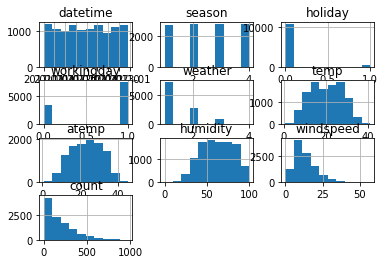

In [25]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [29]:
# create a new feature
train['year'] = train['datetime'].dt.year

#test[?] = ?

In [31]:
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day

In [33]:
train['time'] = train['datetime'].dt.time


In [35]:
train = train.drop(columns=['datetime']) 

In [40]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,time
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,01:00:00
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,02:00:00
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,03:00:00
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,04:00:00


In [ ]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['time'] = test['datetime'].dt.time
test = test.drop(columns=['datetime']) 
test.head()

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [41]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View are new feature
train.head()

In [ ]:
train.info()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1efafb650>,
      dtype=object)

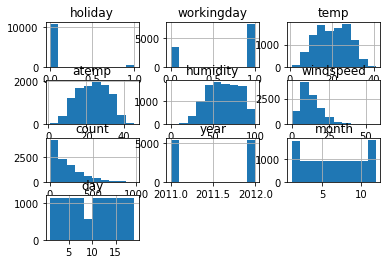

In [44]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [45]:
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train, presets='best_quality', time_limit=600)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220823_123411/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20220823_123411/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.13
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 12
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.

In [ ]:
predictor_new_features.fit_summary()

In [ ]:
# Remember to set all negative values to zero
predictions2=predictor_new_features.predict(test)


In [53]:
num = predictions2._get_numeric_data()

num[num < 0] = 0

In [56]:
predictions2.head()

0    14.033154
1     4.659222
2     3.539883
3     3.559190
4     3.009579
Name: count, dtype: float32

In [54]:
predictions2.describe()

count    6493.000000
mean      188.487717
std       172.267151
min         0.000000
25%        45.204777
50%       146.300079
75%       280.765686
max       882.096863
Name: count, dtype: float64

In [ ]:
# Same submitting predictions
submission_new_features = pd.read_csv('/content/sampleSubmission.csv')
submission_new_features['datetime']=pd.to_datetime(submission_new_features.loc[:, "datetime"])


In [57]:
submission_new_features["count"] = predictions2
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 304kB/s]
Successfully submitted to Bike Sharing Demand

In [59]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2022-08-23 12:54:52  new features          complete  0.44182      0.44182       
submission.csv               2022-08-23 11:54:43  first raw submission  complete  1.80394      1.80394       
submission.csv               2022-08-22 16:11:25  first raw submission  complete  1.77783      1.77783       


#### New Score of `0.44182 `

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [65]:
hyperparameters={'model': 'GBM', 'batch_size': 16, 'lr': 0.001, 'epochs': 10}

In [68]:
predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train, presets='best_quality', time_limit=600,hyperparameters='default' , hyperparameter_tune_kwargs={'num_trials': 2})

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20220823_140630/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20220823_140630/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.13
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 12
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.

In [ ]:
predictor_new_hpo.fit_summary()

In [70]:
predictor3=predictor_new_hpo.predict(test)
predictor3.describe()

count    6493.000000
mean      191.968582
std       172.601654
min        -6.691428
25%        50.275204
50%       152.152084
75%       286.702026
max       889.206482
Name: count, dtype: float64

In [72]:
# Remember to set all negative values to zero
num = predictor3._get_numeric_data()

num[num < 0] = 0

In [73]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('/content/sampleSubmission.csv')
submission_new_hpo['datetime']=pd.to_datetime(submission_new_hpo.loc[:, "datetime"])

submission_new_hpo["count"] = predictor3
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [74]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 396kB/s]
Successfully submitted to Bike Sharing Demand

In [75]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-08-23 14:19:29  new features with hyperparameters  complete  0.53131      0.53131       
submission_new_features.csv  2022-08-23 12:54:52  new features                       complete  0.44182      0.44182       
submission.csv               2022-08-23 11:54:43  first raw submission               complete  1.80394      1.80394       
submission.csv               2022-08-22 16:11:25  first raw submission               complete  1.77783      1.77783       


#### New Score of `0.53131      `

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})